# **Comprehensive Plotly Tutorial: From Basics to Advanced**

This tutorial will guide you through learning Plotly in Python, focusing on interactive visualizations that work perfectly in Google Colab. We'll start with setup, move to basics using Plotly Express (the easiest way), then cover more advanced features with Graph Objects, and finally touch on interactive elements and maps.
All code cells below can be copied directly into a Google Colab notebook. Plots will display interactively inline!

## 1. Setup in Google Colab
Run this first cell to install/upgrade Plotly and import necessary libraries.

In [ ]:
# Install or upgrade Plotly (Colab often has an older version)
!pip install --upgrade plotly

# Import libraries
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np



Plotly works out-of-the-box in Colab with fig.show() – no extra renderer setup needed.

## 2. Basics with Plotly Express (PX)
- Plotly Express (px) is the recommended high-level API for quick, beautiful plots with minimal code.
- Built-in Datasets
- Plotly comes with sample data.

In [ ]:
# Load a built-in dataset
df = px.data.gapminder()  # gapminder is a function returns pandas dataFrame
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


### 🌍 وصف متغيرات مجموعة البيانات

| المتغير (Variable) | الاسم بالعربية | الوصف |
|--------------------|---------------|-------|
| **Country** | الدولة | اسم الدولة |
| **Continent** | القارة | القارة التي تقع فيها الدولة |
| **Year** | السنة | السنة التي تم جمع البيانات فيها |
| **Life Expectancy** | متوسط العمر المتوقع | متوسط عدد السنوات المتوقع أن يعيشها الفرد |
| **Population** | عدد السكان | إجمالي عدد سكان الدولة في تلك السنة |
| **Gross Domestic Product per Capita** | نصيب الفرد من الناتج المحلي | متوسط الدخل (الناتج المحلي الإجمالي ÷ عدد السكان) |
| **ISO Alpha-3 Country Code** | كود الدولة (حروف) | كود الدولة المكون من 3 حروف وفق معيار ISO |
| **ISO Numeric Country Code** | كود الدولة (رقم) | الكود الرقمي الدولي للدولة وفق معيار ISO |


- Basic Scatter Plot

In [ ]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


### 🌸 وصف خصائص زهرة Iris

| المتغير (Variable) | الوصف باللغة العربية |
|-------------------|----------------------|
| **sepal_length**  | طول السَّبَلة |
| **sepal_width**   | عرض السَّبَلة |
| **petal_length**  | طول البَتلة |
| **petal_width**   | عرض البَتلة |
| **species**       | نوع الزهرة |
| **species_id**    | الرقم التعريفي لنوع الزهرة |


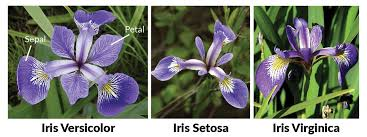

In [ ]:

fig = px.scatter(df,
                 x="sepal_width",
                 y="sepal_length",
                 color="species",  # Color by category
                 size="petal_length",  # Bubble size
                 hover_data=["petal_width"])  # Extra info on hover

fig.update_layout(title="Iris Dataset Scatter Plot")
fig.show()

- Line Chart (Trends over Time)

In [ ]:
df = px.data.gapminder().query("country=='Canada'")

fig = px.line(df, x="year", y="lifeExp", title="Life Expectancy in Canada")
fig.show()

- Bar Chart

In [ ]:
df = px.data.tips()

fig = px.bar(df, x="day", y="total_bill", color="sex", barmode="group",
             title="Total Bill by Day and Sex")
fig.show()

- Histogram & Distributions

In [ ]:
df = px.data.tips()

fig = px.histogram(df, x="total_bill", color="sex", marginal="rug",  # marginal = side plots
                   hover_data=df.columns)
fig.show()

- Box Plot & Violin

In [ ]:
# Step 1: Import libraries
import plotly.express as px

# Step 2: Load example dataset
df = px.data.tips()  # Restaurant tips dataset

# Step 3: Create box plot
fig = px.box(
    df,
    x="day",          # Categories on x-axis (days of week)
    y="total_bill",   # Values to summarize
    color="sex",      # Color by gender
    points="all",     # Show all individual points (optional)
    hover_data=["tip", "size"]  # Extra info on hover
)

# Step 4: Add title and show figure
fig.update_layout(title="Box Plot of Total Bill by Day and Gender")
fig.show()


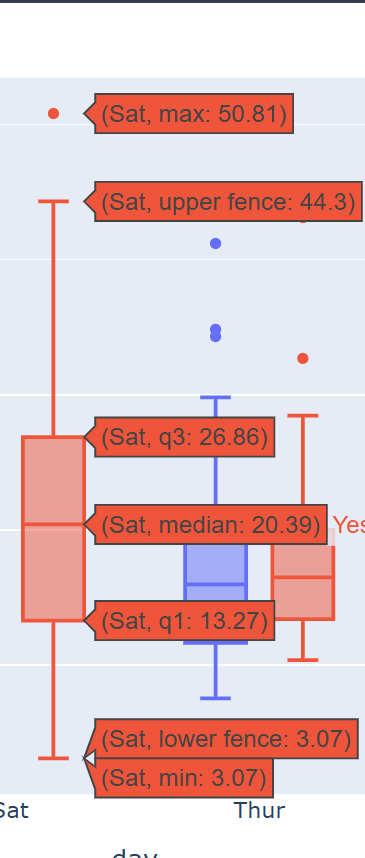

### 🔹 Key Values in Your Boxplot (for “Sat”)

| Label               | Value  | Meaning |
|--------------------|--------|---------|
| **Min**             | 3.07   | The smallest data point within the acceptable range (not an outlier). |
| **Lower fence**     | 3.07   | The lowest value before points are considered outliers. Often calculated as Q1 - 1.5×IQR. |
| **Q1 (first quartile)** | 13.27 | 25% of the data is below this value. The lower edge of the box. |
| **Median (Q2)**     | 20.39  | The middle value of the dataset. 50% of the data is below, 50% above. The line inside the box. |
| **Q3 (third quartile)** | 26.86 | 75% of the data is below this value. Upper edge of the box. |
| **Upper fence**     | 44.3   | The highest value before points are considered outliers. Often Q3 + 1.5×IQR. |
| **Max**             | 50.81  | The largest value in the dataset. Above the upper fence, considered an outlier (shown as a dot above the whisker). |

---

### 🔹 How it fits in the boxplot

**Box:**  
- Bottom = Q1 (13.27)  
- Top = Q3 (26.86)  
- Middle line = Median (20.39)  

**Whiskers:**  
- Bottom whisker = Lower fence = 3.07  
- Top whisker = Upper fence = 44.3  

**Outliers:**  
- Any points outside the fences (like Max = 50.81) are plotted as dots.  
- These represent unusual or extreme values.

---

### 🔹 Interpretation

- Most data for Saturday is between **13.27 and 26.86** (the box).  
- The **median** value is **20.39**.  
- There are some **extreme high values**, e.g., 50.81, considered outliers.  
- The **spread** is shown by the whiskers: from **3.07 to 44.3** for non-outlier values.


- Pie Chart & Sunburst (Part-of-Whole)

In [ ]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
fig = px.pie(df, values='pop', names='country', title='Population of European Countries')
fig.show()

# Sunburst (hierarchical)    # inner level  # outer level
fig = px.sunburst(df, path=['continent', 'country'], values='pop')
fig.show()

## 3. Intermediate: Facets, Animations, and Styling
Faceting (Small Multiples)

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="sex", facet_col="smoker", facet_row="time")
fig.show()

- Animations

In [ ]:
df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()

### 📊 Scatter Plot Parameters Explained

- **x = "gdpPercap"**  
  X-axis shows **GDP per capita** of each country.

- **y = "lifeExp"**  
  Y-axis shows **life expectancy** of each country.

- **animation_frame = "year"**  
  The plot is **animated over time**, one frame per year.  
  Scatter points **move/change** as the year changes.

- **animation_group = "country"**  
  Ensures each country stays as the **same "dot" across frames**, so you can track it over time.

- **size = "pop"**  
  The **size of each bubble** represents the population of the country.

- **color = "continent"**  
  Color of bubbles is determined by the **continent**, making it easy to compare continents visually.

- **hover_name = "country"**  
  When you **hover** over a bubble, it shows the **country name**.

- **log_x = True**  
  X-axis is on a **logarithmic scale**.  
  Useful because GDP per capita varies widely (some countries are very rich, others very poor).

- **size_max = 55**  
  Maximum bubble size. Prevents very large bubbles from dominating the plot.

- **range_x = [100, 100000]**  
  Limits X-axis from **100 to 100,000** for better visualization.

- **range_y = [25, 90]**  
  Limits Y-axis from **25 to 90** (life expectancy range).


In [ ]:
df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()

- Choropleth Map

In [ ]:
df = px.data.gapminder().query("year==2007")

fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Life Expectancy by Country (2007)")
fig.show()

### 📍 Explanation of the Choropleth Map Code

This line creates a **choropleth map** (a world map colored by values) using Plotly Express:

- **`df`** → the filtered data for **2007**.

- **`locations="iso_alpha"`** → tells Plotly which **country code** to use for plotting on the map.  
  - `iso_alpha` contains **3-letter ISO country codes**, e.g., `USA`, `IND`, `BRA`.

- **`color="lifeExp"`** → the **color of each country** is determined by **life expectancy**.  
  - Higher life expectancy → different color on the map.

- **`hover_name="country"`** → when you **hover** over a country, it shows the **country name**.

- **`color_continuous_scale=px.colors.sequential.Plasma`** → sets the **color scale**.  
  - Plasma is a sequential color map that goes from **dark purple → yellow**.

- **`title="Life Expectancy by Country (2007)"`** → sets the **title of the map**.


- Scatter on Map

In [ ]:
df = px.data.carshare()
df.head()

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20
3,45.522870,-73.595677,560.166667,23
4,45.453971,-73.738946,2836.666667,19


### 🚗 Plotly Express `carshare` Dataset

- **`px.data.carshare()`** is a **built-in dataset** in Plotly Express.

- This dataset contains information about **car-sharing usage** in a city, including:

- تحتوي هذه المجموعة على معلومات حول **استخدام مشاركة السيارات** في مدينة معينة، وتشمل:
  - **`centroid_lat`** → latitude of the car-sharing location.  → خط عرض موقع مشاركة السيارات
  - **`centroid_lon`** → longitude of the car-sharing location.  → خط طول موقع مشاركة السيارات.
  - **`peak_hour`** → the peak hour of car usage at that location.     → ساعة الذروة لاستخدام السيارات في ذلك الموقع
  - **`car_hours`** → total number of car usage hours at that location.  → إجمالي عدد ساعات استخدام السيارات في ذلك الموقع.
  - Other fields such as **`hour`**, **`cars`**, etc.

- After loading, **`df`** is a **pandas DataFrame** containing this car-sharing data.


In [ ]:
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                        zoom=10, mapbox_style="carto-positron")
fig.show()

/tmp/ipython-input-2827997440.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### 🗺️ Scatter Plot on a Mapbox Map

Here you are creating a **scatter plot on a Mapbox map**. Let’s break down the parameters:

- **`df`** → The **DataFrame** used as the data source.

- **`lat="centroid_lat"`** → Column in `df` used for the **latitude** of each point.

- **`lon="centroid_lon"`** → Column in `df` used for the **longitude** of each point.

- **`color="peak_hour"`** → The **color of the points** will be based on the `peak_hour` column.  
  - Different peak hours → different colors.

- **`size="car_hours"`** → The **size of the points** depends on `car_hours`.  
  - More car usage → bigger point on the map.

- **`zoom=10`** → The **zoom level** of the map.  
  - Higher value → map is more zoomed in.

- **`mapbox_style="carto-positron"`** → The **visual style** of the map.  
  - `"carto-positron"` gives a clean, light-colored map.

✨ **In short:**  
This creates a **bubble map**, where each point represents a car-sharing location.  
- **Color** → peak usage hour  
- **Size** → total car usage hours  
- **Position** → geographic location (latitude & longitude)


In [ ]:
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                        zoom=10, mapbox_style="open-street-map")
fig.show()

## 4. Advanced: Using Graph Objects (go) for Full Control
Plotly Express is great for quick plots, but Graph Objects give fine-grained control (e.g., multiple traces, custom layouts).
- Basic with go

In [ ]:
fig = go.Figure() # This creates an empty figure object called fig.

# Add traces
fig.add_trace(go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13], mode='markers', name='Markers'))
fig.add_trace(go.Scatter(x=[1, 2, 3, 4], y=[16, 17, 18, 19], mode='lines+markers', name='Lines+Markers'))

fig.update_layout(title="Custom Scatter with Multiple Traces")
fig.show()

- Subplots

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))

fig.add_trace(go.Scatter(x=[1,2,3], y=[4,5,6]), row=1, col=1)
fig.add_trace(go.Bar(x=["a","b","c"], y=[12,18,10]), row=1, col=2)
fig.add_trace(go.Histogram(x=np.random.randn(500)), row=2, col=1)
fig.add_trace(go.Box(y=np.random.randn(50)), row=2, col=2)

fig.update_layout(height=600, title_text="Subplots Example")
fig.show()

- 3D Plots

In [ ]:
df = px.data.iris()

fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length',
                    color='species', size='petal_width')
fig.show()

# Surface plot
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_layout(title='3D Surface', autosize=False, width=500, height=500)
fig.show()

- Custom Layouts & Annotations

In [ ]:
fig = px.line(px.data.gapminder().query("country=='Canada'"), x="year", y="gdpPercap")

fig.update_layout(
    title="Custom Layout Example",
    xaxis_title="Year",
    yaxis_title="GDP per Capita",
    template="plotly_dark"  # Themes: plotly, plotly_white, plotly_dark, etc.
)

fig.add_annotation(x=1980, y=25000, text="Interesting Point!", showarrow=True, arrowhead=2)
fig.show()

## 5. Interactive Features (Sliders, Dropdowns, Buttons)

In [ ]:
df = px.data.gapminder()

fig = go.Figure()

# Add traces for continents (initially one visible)
for continent in df['continent'].unique():
    df_cont = df.query(f"continent == '{continent}'")
    fig.add_trace(go.Scatter(x=df_cont['gdpPercap'], y=df_cont['lifeExp'],
                             name=continent, visible=(continent=='Americas')))

# Dropdown menu
buttons = []
for continent in df['continent'].unique():
    buttons.append(dict(label=continent,
                        method='update',
                        args=[{'visible': [c == continent for c in df['continent'].unique()]},
                              {'title': f'{continent} Data'}]))

fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction="down", showactive=True)],
    title="Interactive Dropdown by Continent"
)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=[1,2,3], y=[1,3,2]))
fig.update_layout(title="A Figure Specified By go.Figure")
fig.show()


In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", title="A Plotly Express Figure")

# If you print the figure, you'll see that it's just a regular figure with data and layout
# print(fig)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.show()

# mode="lines" → only draw a line (no markers)

In [ ]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")

fig.add_trace(
    go.Scatter(
        x=[2, 4],
        y=[4, 8],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", facet_col="species",
                 title="Adding Traces To Subplots Witin A Plotly Express Figure")

reference_line = go.Scatter(x=[2, 4],
                            y=[4, 8],
                            mode="lines",
                            line=go.scatter.Line(color="gray"),
                            showlegend=False)

fig.add_trace(reference_line, row=1, col=1)
fig.add_trace(reference_line, row=1, col=2)
fig.add_trace(reference_line, row=1, col=3)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(y=[1, 3, 2], line_color="crimson")],
    layout_title_text="A Graph Objects Figure With Magic Underscore Notation"
)

fig.show()

In [1]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(y=[1, 3, 2], line_color="green")],
    layout_title_text="A Graph Objects Figure With Magic Underscore Notation"
)

fig.show()

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_scatter(y=[4, 2, 3.5], mode="markers",
                marker=dict(size=20, color="LightSeaGreen"),
                name="a", row=1, col=1)

fig.add_bar(y=[2, 1, 3],
            marker=dict(color="MediumPurple"),
            name="b", row=1, col=1)

fig.add_scatter(y=[2, 3.5, 4], mode="markers",
                marker=dict(size=20, color="MediumPurple"),
                name="c", row=1, col=2)

fig.add_bar(y=[1, 3, 2],
            marker=dict(color="LightSeaGreen"),
            name="d", row=1, col=2)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"

fig.show()

In [2]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.data[0].marker.line.width = 4

fig.show()

In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.data[0].marker.line.width = 20
fig.data[0].marker.line.color = "black"

fig.show()

In [ ]:
import plotly.express as px
import numpy as np

t = np.linspace(0, 2*np.pi, 100)  # generates 100 points evenly spaced numbers from 0 to 2π

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder().query("continent == 'Oceania'")  # أوقيانوسيا  ==القارة
fig = px.line(df, x='year', y='lifeExp', color='country')
fig.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
fig.show()

In [ ]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

In [ ]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [ ]:
import plotly.express as px

long_df = px.data.medals_long()
                      # دولة
fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [ ]:
import plotly.express as px

df = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             height=400)
fig.show()

In [ ]:
import plotly.express as px

df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s', # 2 digit
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### 📌 Bar Chart Text Parameters

| Parameter             | Meaning |
|-----------------------|---------|
| **`textfont_size=12`**    | Font size of the text labels. |
| **`textangle=0`**         | Text is horizontal (0 degrees). |
| **`textposition="outside"`** | Place text **above the bar** instead of inside it. |
| **`cliponaxis=False`**     | Allow text to appear **outside the plot area** if necessary. |


In [17]:
import plotly.express as px

df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.3s', # 3 digit
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.medals_long()

fig = px.bar(df, x="medal", y="count", color="nation",
             pattern_shape="nation", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [ ]:
import plotly.graph_objects as go

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],
    name='Primary Product',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[19, 14, 22, 14, 16, 19, 15, 14, 10, 12, 12, 16],
    name='Secondary Product',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(df, values='tip', names='day')
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color='day',
             color_discrete_map={'Thur':'lightcyan',
                                 'Fri':'cyan',
                                 'Sat':'royalblue',
                                 'Sun':'darkblue'})
fig.show()

In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen'],
                             values=[4500,2500,1053,500])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

### Parameters Explained

- **`hoverinfo='label+percent'`**  
  When you hover over a slice, it shows: **the label (name) + percentage of total**.

- **`textinfo='value'`**  
  Shows the **actual numeric value** inside the slice.

- **`textfont_size=20`**  
  Sets the **size of the text** displayed inside the slices.

- **`marker=dict(...)`** → Customizes the slice appearance:  
  - **`colors=colors`** → Assigns the colors defined earlier to the slices.  
  - **`line=dict(color='#000000', width=2)`** → Adds a **black border line** around each slice with width 2.


In [ ]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

In [21]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="total_bill", y="day")
fig.show()

In [23]:
import plotly.express as px

df = px.data.tips()
fig = px.bar(df, x="day", y="total_bill")
fig.show()


In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['A Scores', 'B Scores']),
                 cells=dict(values=[[100, 90, 80, 90], [95, 85, 75, 95]]))
                     ])
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()

fig = px.box(df, x="sex", y="total_bill", color="smoker")
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.icicle(df, path=[px.Constant("all"), 'day', 'time', 'sex'], values='total_bill')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()